In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

#create model
model = Sequential()

# Prima convoluzione.
# Ricordiamo che nel primo livello, usando sequential() dobbiamo specificare la dimensione dell'imput,
# in modo che la rete sa come gestirlo.
# --
# 64 rappresenta il numero di filtri, mentre kernel_size=3 indica la dimensione dei filtri (quadrati)
# otterrò quindi 64 filtri 3x3 con relu come funzione di attivazione sulla convoluzione
# --
# In pratica qui ho 3x3x64 filtri da ottimizzare = 576 a cui devo aggiungere un bias per ognuno dei filtri
# che saranno poi passati alla funzione di attivazione (relu in questo caso) assieme ai filtri.
#
# Abbiamo quini 3x3x64 + 64 = 640 filtri
model.add(
    Conv2D(
        64, 
        kernel_size=3, 
        activation='relu', 
        input_shape=(28,28,1) # This is the shape of each input image, 28,28,1 with the 1 signifying that the images are greyscale.
    )
)

# Seconda convoluzione
# Ricordiamo qui che la dimensione della feautere map è data da:
# [(W−K+2P)/S]+1
# Dove
# W is the input volume (28)
# K is the Kernel size - (3)
# P is the padding - (0: default)
# S is the stride - (1: default)
# Da cui abbiamo
# [ (28−3 + 2*0)/1] + 1 = 26
# ---
# Quindi questo punto ho una feature maps 26x26x64 che sarà l'input della mia prossima convoluzione 

# In queststa convoluzione abbiamo un input di 26x26x64, quindi i nostri filtri saranno kernel_size*kernel_size*64
# Dunque in questo caso avremmo 32 filtri di 3x3x64 a cui si sommano i 32 bias.
# Questo ci da un totale di 3x3x64x32 + 32 = 18,464 parametri
model.add(
    Conv2D(
        32, 
        kernel_size=3, 
        activation='relu'
    )
)


# Poiché [ (26−3 + 2*0)/1] + 1 = 24, allora qui otteniamo una feature map di 24x24x32 che andrà poi in input al prossimo livello flatten -> dense


# A questo punto appiattiamo la feature map precedente dato che questo step rappresenterà l'input
# della rete dense che si aspetta un vettore di "n" features
# --
# Questo appiattimento ci darà un vettore di dimensione 24x24x32 = 18,432 elementi, ma zero parametri, dato che la flatten non ha parametri
model.add(
    Flatten() # Flatten serves as a connection between the convolution and dense layers.
)

# In questo step abbiamo una rete dense di unit=10 neuroni, connessi a 18,432 feauters in input.
# Questo genera 184,320 parametri a cui si sommano di 10 bias dei singoli neuroni, per totale di 184,330 paramentri totali
model.add(
    Dense(
        units=10, 
        activation='softmax' # Softmax makes the output sum up to 1 so the output can be interpreted as probabilities.
    )
)

#Alla fine otteniamo un output di 10 valori dopo la softmax che rappresentano, per ogni valore, 
# le probabilità identificate dalla rete dell'appartenenza del'input a quella classe specifica


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 10)                184330    
                                                                 
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


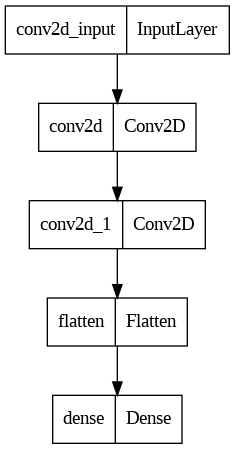

In [4]:
from tensorflow.keras.utils import plot_model
plot_model(model)